In [141]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
%matplotlib inline

In [142]:
def generate_barabsi_albert_directed(n: int) -> np.ndarray:
    """Generates graph with `n` nodes via a preferential attachement process. 
    Returns its binary 0/1 adjacency matrix."""
    edges = [
        (1, 2)
    ]

    G = nx.DiGraph()
    G.add_edges_from(edges)

    for i in tqdm(range(3, n + 1)):
        degrees_dict = dict(G.degree)
        degree_sum = np.sum(list(degrees_dict.values()))
        G.add_node(i)
        for ver in degrees_dict:
            p = degrees_dict[ver] / degree_sum
            rand = np.random.rand()
            if rand < p:
                l = [ver, i]
                a = np.random.choice([0, 1])
                G.add_edge(l[a], l[a - 1])

    adjacency = np.array(nx.adjacency_matrix(G).todense())
    pos = nx.layout.fruchterman_reingold_layout(G)
    plt.figure(figsize=(16, 9))
    nx.draw(G, pos = pos, node_size = 20)
    return G, adjacency

100%|██████████| 998/998 [00:00<00:00, 2492.90it/s]


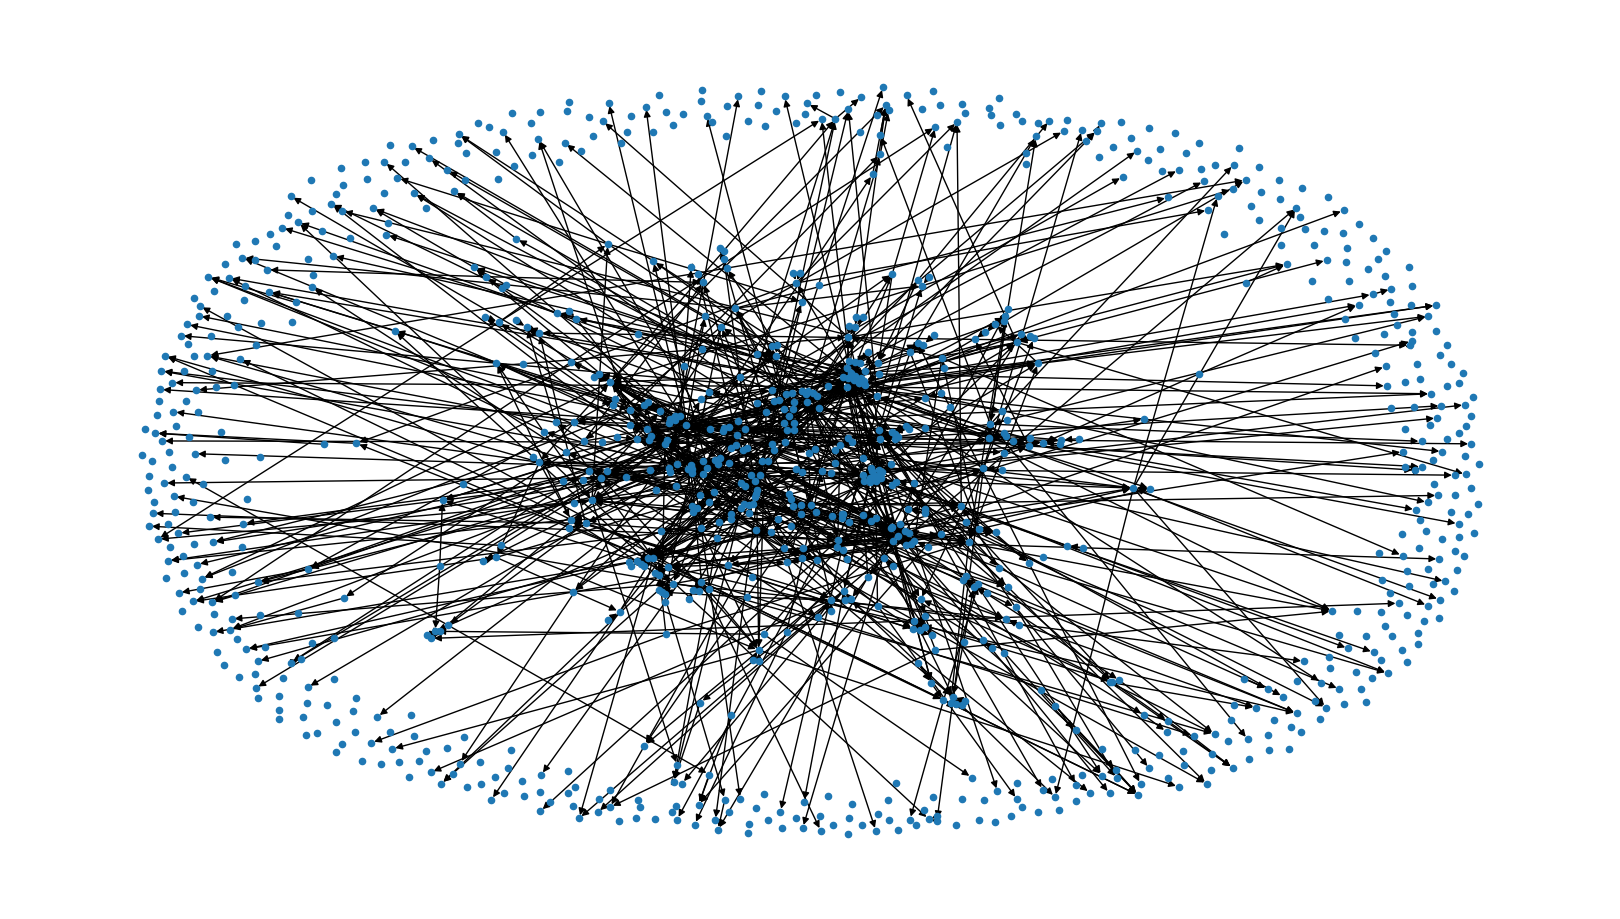

In [143]:
N = 1000
G, adjacency = generate_barabsi_albert_directed(N)

# adjacency[adjacency>1] = 1

In [144]:
# print(adjacency)
# np.save("adg_barabsi.npy", adjacency)

[[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [145]:
cur_node = 1
iters = 100000
pagerank_vec = np.zeros(N)
alpha = 0.1
i = 0
# MCMC
while i < iters:
    neighbors = list(G[cur_node].keys())
    while len(neighbors) == 0:
        cur_node = np.random.choice(range(1, N+1))
        pagerank_vec[cur_node-1] += 1
        neighbors = list(G[cur_node].keys())
        i += 1

    if np.random.random() > alpha:
        cur_node = np.random.choice(neighbors)
    else:
        cur_node = np.random.choice(range(1, N+1))

    pagerank_vec[cur_node-1] += 1
    i += 1


In [146]:
pagerank_vec = pagerank_vec / np.sum(pagerank_vec)
pagerank_vec

array([0.01425986, 0.01309987, 0.00147999, 0.00915991, 0.00350996,
       0.00047   , 0.00168998, 0.00043   , 0.00919991, 0.0095599 ,
       0.00422996, 0.00229998, 0.00809992, 0.00041   , 0.00800992,
       0.00252997, 0.00300997, 0.00042   , 0.00107999, 0.00211998,
       0.00117999, 0.0003    , 0.00090999, 0.00252997, 0.00519995,
       0.00453995, 0.00097999, 0.00283997, 0.0005    , 0.00050999,
       0.00104999, 0.00159998, 0.00046   , 0.00051999, 0.00244998,
       0.00115999, 0.00043   , 0.00455995, 0.00050999, 0.00303997,
       0.00256997, 0.00249998, 0.00451995, 0.00049   , 0.00134999,
       0.00034   , 0.00104999, 0.00057999, 0.00337997, 0.00052999,
       0.00127999, 0.00052999, 0.00174998, 0.0004    , 0.00035   ,
       0.00049   , 0.00045   , 0.00085999, 0.00190998, 0.00179998,
       0.00056999, 0.00274997, 0.00082999, 0.00045   , 0.00112999,
       0.00085999, 0.00032   , 0.00370996, 0.00045   , 0.00151998,
       0.00219998, 0.00037   , 0.00087999, 0.00541995, 0.0004 

In [147]:
# np.save("pagerank_barabsi.npy", pagerank_vec)

In [127]:
def generete_simple():
    edges = [
        (1, 2),
        (2, 3),
        (3, 4),
        (4, 2),
    ]

    G = nx.DiGraph()
    G.add_edges_from(edges)

    G.add_node(5)

    adjacency = np.array(nx.adjacency_matrix(G).todense())
    pos = nx.layout.fruchterman_reingold_layout(G)
    plt.figure(figsize=(16, 9))
    nx.draw(G, pos = pos, node_size = 20)
    return G, adjacency

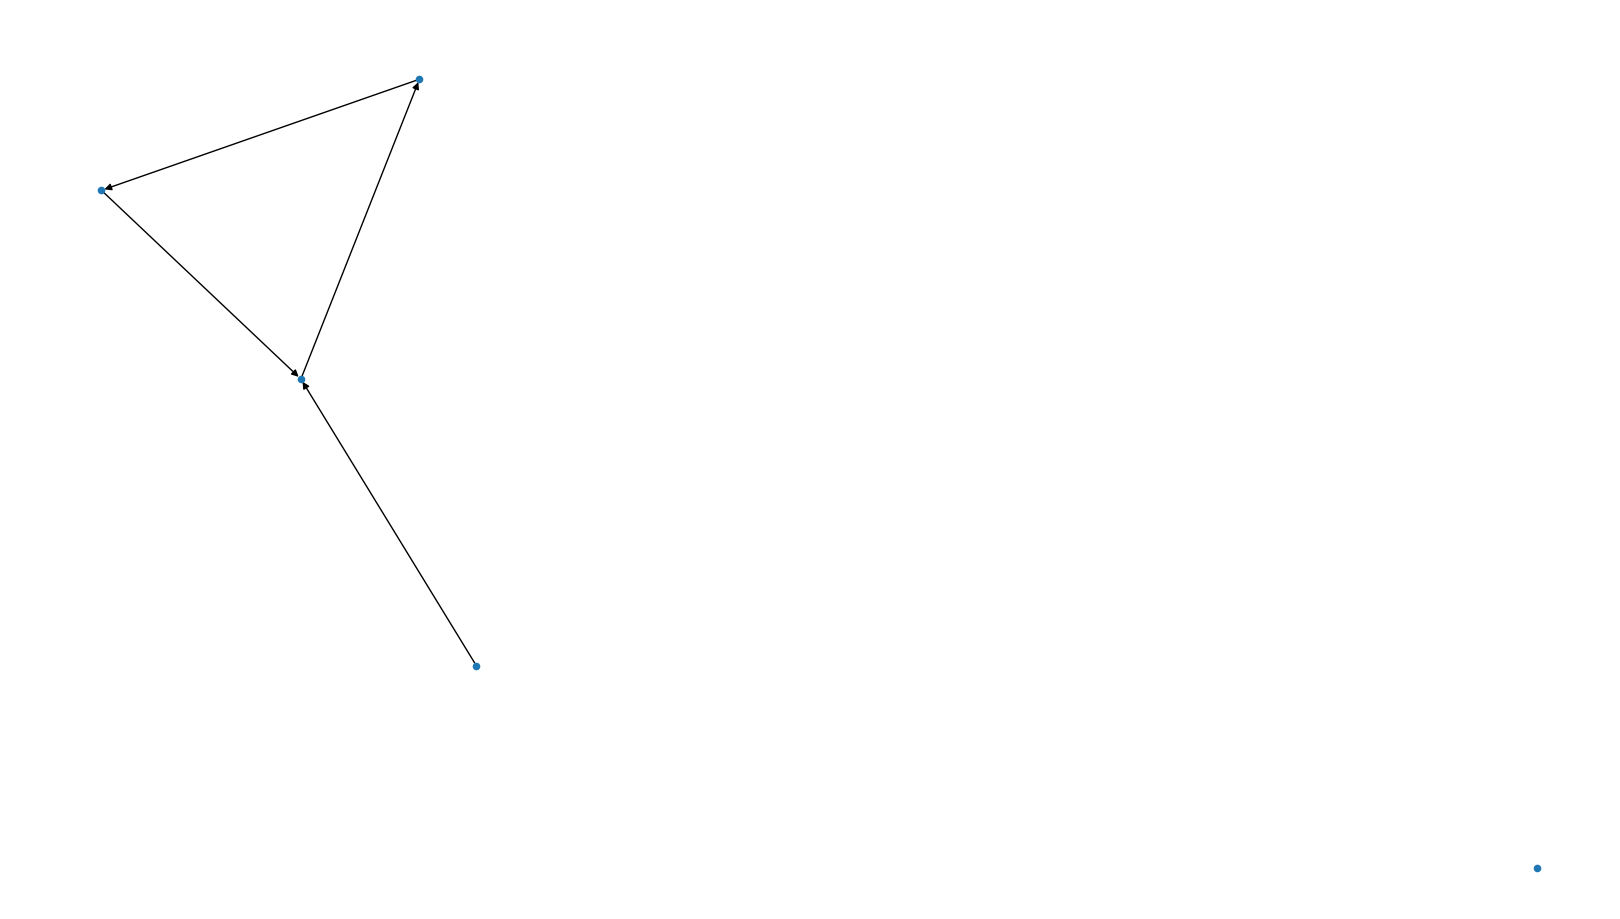

In [128]:
G_simple, adjacency_simple = generete_simple()
N = 5

In [129]:
print(adjacency_simple)
np.save("adg.npy", adjacency_simple)

[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]


In [130]:
cur_node = 1
iters = 100000
pagerank_vec = np.zeros(N)
alpha = 0.1
i = 0
while i < iters:
    neighbors = list(G_simple[cur_node].keys())
    while len(neighbors) == 0:
        cur_node = np.random.choice(range(1, N+1))
        pagerank_vec[cur_node-1] += 1
        neighbors = list(G_simple[cur_node].keys())
        i += 1

    if np.random.random() > alpha:
        cur_node = np.random.choice(neighbors)
    else:
        cur_node = np.random.choice(range(1, N+1))

    pagerank_vec[cur_node-1] += 1
    i += 1

In [131]:
pagerank_vec = pagerank_vec / np.sum(pagerank_vec)
np.save("pagerank.npy", pagerank_vec)

In [132]:
pagerank_vec

array([0.02426, 0.32465, 0.31686, 0.30893, 0.0253 ])